In [155]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Intro

We have looked at the **z-test** or **t-test** for sample proportion, which is to estimate the proportion of one category of a category random variable that has only two possible outcomes (**Binomial random variable**). For example, the estimated approval rate of a presidential candidate. 

Here, we will extend the hypothesis test involving the following, which can be done with **Chi-square distribution**.

|Data|Test for|
|:---|:---|
|Several categories (possible outcomes) of a categorical variable|Goodness-of-fit|
|Two or more categorical variables|Relationship (Homogeneity and independence)|


# Chi-squared Distribution

https://onlinestatbook.com/2/chi_square/Chi_Square.html


http://www.stat.yale.edu/Courses/1997-98/101/chigf.htm


https://online.stat.psu.edu/stat504/book/export/html/683

## Definition

<br>
<div style="background-color:blue;color:white;padding:10px 10px 10px 10px">
<ul>
    <li>A <b>standard normal deviate</b>, $z$, is a random sample from the <b>standard normal distribution</b>;
    <li>The <b>Chi-squre distribution</b>, $X^2$, is the distribution of the sum of squared <b>standard normal deviates</b>;
    <li>The <b>degrees of freedom (df)</b> of the distribution is equal to the number of <b>standard normal deviates</b> being summed ($k$)
    </ul>
</div>

$$\boxed{X^2 = \sum_{i=1}^{k} z_i^2\text{ where   df=k}}$$


## Characteristics of the Distribution

- The mean of a **Chi-square distribution** is its degrees of freedom:

$$\mu = k$$


- The standard deviation of a **Chi-square distribution** is its degrees of freedom doubled: 

$$\sigma = 2k$$

- According to **Central limit theorem**, $X^2$ distribution approahces a normal distribution as its degrees of freedom increase, because it's a distribution of sample sums.

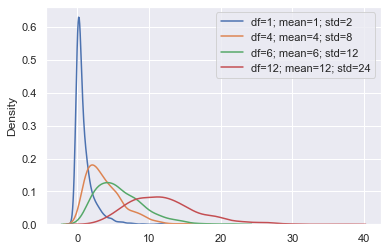

In [164]:
size = 1000
for k in [1, 4,6,12]:
    q = np.random.chisquare(k,size)
    sns.kdeplot(q, label=f'df={k}; mean={k}; std={2*k}')
    
plt.legend()
plt.show()

## Probability of Observing a Value

The probability of observing a value on the **Chi-square distribution** can be found using statistical software or [Chi-square probability table](https://people.richland.edu/james/lecture/m170/tbl-chi.html). 

For example, what is the probability of the sum of 2 randomly selected standard scores squared being 6 or higher: $P(X^2(2) > 6)$?

### Using Chisquare Probability Table

From the table below, we can see that with df=2, where the value around $5.991$, which is close to $6$, the probability displayed is $0.05$

<img src="../img/chisquare-table.png" width=500>



### Using `Scipy.stats` Library

In [218]:
df, value = 2, 6
prob_smaller_than_6 = st.chi2(df).cdf(value)
prob_larger_than_6 = 1-prob_smaller_than_6
round(prob_larger_than_6,2)

0.05

# Chi-square Test for Goodness of Fit 


https://online.stat.psu.edu/stat504/book/export/html/683


The **Chi-square distribution** can be used to test whether observed data, from a randomly selected sample, correspond to the fitted (assumed) model or differs significantly from the theoretical expectation. This kind of test of called **test for goodness of fit**.

In the setting for one-way tables, we measure how well an observed random varaible corresponds to a **multinomial random variable** $X\sim \text{Mult}(n, \pi)$, where $\pi$ is a list of probabilities for each possible outcomes. 

A goodness-of-fit statistic tests the following hypothesis:

- $H_0$: the model  fits
- $H_a$: the model  does not fit (or, some other model fits)



## Testing Procedures

### Test Statistic ($T$)

In **test for goodness of fit**, we follow the steps below to calculate the test statistic, denoted as $T$:

- First, given $H_0$ is true, we use the **theorectical proportion** to calculate the `expected` counts for all categories: $E_i$
- Second, we calculate the differences between `observed` ($O_i$) and `expected` ($E_i$) counts: $O_i - E_i$; 
- Since the differences can be positive or negative, we don't want the deviation being offset when we combine the differences. Therefore, we squre the differences:  $(O_i-E_i)^2$;
- And then, we standardize the squared differences by dividing them by the expected values of each categories: $\frac{(O_i-E_i)^2}{E_i}$, 
- Finally, we sum the standardized differences up: $\sum_{i=1}^k \frac{(O_i-E_i)^2}{E_i}$. This can be translated into the standard normal deviate $\sum\frac{(x-\mu)^2}{\sigma}$ and $\mu=\sigma$. Therefore, 
- which gives us the variances ($z^2$) that follow the standard normal distribution;
- Then, we sum up the $z^2$ derived; and this gives us the test statistics $T$, which follows a **Chi-square** distribution ($x^2$) 
- Test for goodness of fit is also called test for **deviation**.

Here's the general Chi-square test statistic formula for **goodness of fit**:

<br>
<div style="border:1px solid black;padding:10px 10px 10px 10px">
$$T = x^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}\text{ , df}=k-1$$

where:
- $O_i$ is the observed count in category $i$;

- $E_i$ is the expected count in category $i$ and $E_i = np_i$ where 
    - $p_i$ is the expected ratio;
    - $n$ is the sample size;
    - <u>Since **chi-square test** assumes normal distribution approximation of $E_i$, it's required that $E_i$ or its equivalent $np_i \geq 5$ </u>
    
- $k$ is the number of categories;
- The **degrees of freedom** is now $k-1$ because this is a sampling distribution of $\sum \frac{(O-E)^2}{E}$
</div>

### Critical Value

In order to conclude a decision, we need to know the Chi-square **critical value**, denoted as $X^2_{., d}$:



### Decision Rules (Rejection Region)

We can make a decision by comparing the test statistic $T$ (given $H_0$ is true) to the critical value. 

<u>We can reject $H_0$</u>, if:

1. Left-tailed test:  $\boxed{T < X^2_{\alpha, k-1}}$
2. Right-tailed test:  $\boxed{T > X^2_{1-\alpha, k-1}}$  
3. Two-tailed test: $\boxed{T < X^2_{\alpha/2, k-1}\text{ or } T > X^2_{1-\alpha/2, k-1}}$

where $k-1$ is the **degrees of freedom**.

<img src='../img/critical_values_directions.png' width=300>

### Decision Rules (P-value)

Or, we can use **p-value** to decide the conclusion. 

Note that the **p-value** is the probability of observing a sample statistic that is as or more than the observed test statistic $T$ given $H_0$ is true. 

|||
|:---|:---|
|Left-tailed test|$$\text{If }P(X^2 \leq T) < \alpha,\text{ Reject }H_0$$|
|Right-tailed test|$$\text{If }P(X^2 \geq T) < \alpha,\text{ Reject }H_0$$|
|Two-tailed test|$$\text{If }P(X^2 \leq -|T|) + P(X^2 \geq |T|) < \alpha,\text{ Reject }H_0$$|


## Example: M&M Color Ratios

M&M used to post the proportions of different colors in their mixed bag, which was last updated on the company website in 2008, as follows:

In [176]:
colors = ['Blue', 'Orange', 'Green', 'Yellow', 'Red', 'Brown']
published_ratios = [.24, .2, .16, .14, .13, .13]

mm_colors = pd.DataFrame({'color':colors, 'proportion':published_ratios})\
         .set_index('color')
mm_colors.index.name = None
mm_colors.transpose()

,Blue,Orange,Green,Yellow,Red,Brown
proportion,0.24,0.2,0.16,0.14,0.13,0.13


### Research Question

A student recently bought a bag of M&M to inspect the contents, and got the following counts in the same color order:

In [177]:
observed = [85, 79, 56, 64, 58, 68]

So that we have the following new data:

In [178]:
mm_colors['observed']=observed
mm_colors

,proportion,observed
Blue,0.24,85
Orange,0.20,79
Green,0.16,56
Yellow,0.14,64
Red,0.13,58
Brown,0.13,68


Are the observed counts from the sample bag consistent with the last published proportions? Or, is there sufficient evidence to claim that the color distribution is now different? This question requires a **test for goodness-of-fit** for the 6 colors (**categories**). 

### The Hypotheses

In order to conduct the test, we will formulate the hypothesis as follows:

- $H_0$: "nothing is extraordinary is going on", i.e. the color distribution is given by the ratio from 2008

- $H_a$: the color distribution is different from the 2008 ratio. Note that the alternative hypothesis concerns with being "different" only, there is no directional comparison. Therefore, this will be a **two-tailed test**.


The idea is to compare the `observed` to the numbers one would expect if $H_0$ is true. The `expected` count of each color would be computed by:

$$E_i = np_i$$

where, in this example, we have:

- $n = \text{Total M&Ms in the sample bag}$
- $p_i = \text{ the proportion of color from 2008}$

In [179]:
mm_colors['expected'] = mm_colors['proportion'] * sum(observed)
mm_colors

,proportion,observed,expected
Blue,0.24,85,98.4
Orange,0.20,79,82.0
Green,0.16,56,65.6
Yellow,0.14,64,57.4
Red,0.13,58,53.3
Brown,0.13,68,53.3


### Compute the Test Statistic

First, let's check if each $E_i = np_i$ is greater than 5, which is required to conduct **Chi-square test**:

In [180]:
mm_colors.expected >= 5

Blue      True
Orange    True
Green     True
Yellow    True
Red       True
Brown     True
Name: expected, dtype: bool

Since the requirement is met, we can now compute the Chi-square test statistic:

In [182]:
mm_colors['variance'] = (mm_colors.observed - mm_colors.expected)**2/mm_colors.expected
mm_colors

,proportion,observed,expected,variance
Blue,0.24,85,98.4,1.824797
Orange,0.20,79,82.0,0.109756
Green,0.16,56,65.6,1.404878
Yellow,0.14,64,57.4,0.758885
Red,0.13,58,53.3,0.414447
Brown,0.13,68,53.3,4.054221


In [186]:
chi_sqr = mm_colors['variance'].sum()
round(chi_sqr, 3)

8.567

### Conclusion using P-value

Let's compute the p-value, the probability of observing a chi-squre statistic that is as or more extreme than the observed test statistic $T=8.567$. 

Since this is a **two-tailed test**, the probability shall include both sides: 
- $P(X^2 < -8.567)$
- $P(X^2 > 8.567)$

p-value:0.128


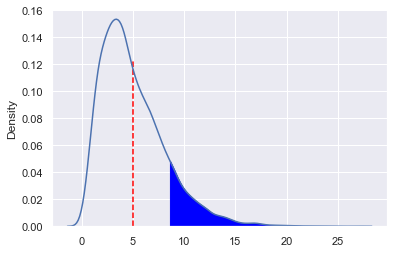

In [225]:
df = len(colors)-1

# simulate and plot the sampling chi-squre distribution
x = np.random.chisquare(df, size=10000)
points = sns.kdeplot(x).get_lines()[0].get_data()
x,y = points[0], points[1]

# display the mean of the sampling distribution, which equals the df
plt.vlines(df, ymin=0, ymax=st.chi2(df).pdf(df), color='red', linestyle='--')

# calculate the print the p-value
p = st.chi2(df).cdf(-chi_sqr)+(1-st.chi2(df).cdf(chi_sqr))
print(f'p-value:{p:.3f}')

# show the area under the curve that represents the p-value
plt.fill_between(x, y, where=x<-chi_sqr, color='blue')
plt.fill_between(x, y, where=x>chi_sqr, color='blue')

plt.show()

If we'd like to draw the conclusion with 95% confidence, we'd compare the p-value to $\alpha=0.05$. Since $0.128 > 0.05$, we don't have sufficient evidence to reject the null hypothesis. 

That is, we are 95% confident that the M&M color distribution nowadays still follows that from 2008.

# Chi-square Test for Relationship between Two Categorical Variables

### Contingency Table

**Contingency table** is used to represent the relaitonship between two categorical variables. The following titanic data is an example of 2 x 2 table that shows the relationship between `survived` and `class`.

In [116]:
df = sns.load_dataset('titanic')
df.loc[df.survived == 0, 'survived']='Died'
df.loc[df.survived == 1, 'survived']='Survived'
two_tb = pd.crosstab(df.survived, df['class'])
two_tb.index.name = None # remove index name
two_tb.columns.name = None # remove col name
two_tb

,First,Second,Third
Died,80,97,372
Survived,136,87,119
